In [4]:
import pandas as pd
df = pd.read_csv ('/Users/pratanuroy/Downloads/remote_worker_productivity_1000.csv')

# Or Windows full path (use raw string or double backslashes)
# df = pd.read_csv(r'C:\Users\pratanuroy\Downloads\yourfile.csv'

print(df.head())


  worker_id location_type industry_sector  age  experience_years  \
0     W0001       Village      Healthcare   23                26   
1     W0002          City      Healthcare   27                27   
2     W0003       Village          Retail   30                 8   
3     W0004       Village         Finance   54                19   
4     W0005          City       Education   46                 1   

   average_daily_work_hours  break_frequency_per_day  task_completion_rate  \
0                      7.45                        1             66.377024   
1                      9.82                        3             88.226501   
2                      7.38                        2             67.004170   
3                      8.37                        1             66.004424   
4                      7.51                        4             91.468942   

   late_task_ratio  calendar_scheduled_usage  focus_time_minutes  \
0         0.254624                 55.496926          

In [6]:
#identifying and dropping invalid experience rows
min_work_start_age = 18

# Find rows where experience_years is invalid
invalid_exp = df[df['experience_years'] > (df['age'] - min_work_start_age)]
print(f"Invalid rows count: {len(invalid_exp)}")

# Drop those invalid rows from df
df = df.drop(invalid_exp.index)

# Check that no invalid experience remains
print(f"Invalid rows remaining after drop: {len(df[df['experience_years'] > (df['age'] - min_work_start_age)])}")

# Check final data shape
print(f"Data shape after dropping invalid rows: {df.shape}")


Invalid rows count: 361
Invalid rows remaining after drop: 0
Data shape after dropping invalid rows: (639, 17)


In [4]:
#checking clean data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 2 to 998
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worker_id                 639 non-null    object 
 1   location_type             639 non-null    object 
 2   industry_sector           639 non-null    object 
 3   age                       639 non-null    int64  
 4   experience_years          639 non-null    int64  
 5   average_daily_work_hours  639 non-null    float64
 6   break_frequency_per_day   639 non-null    int64  
 7   task_completion_rate      639 non-null    float64
 8   late_task_ratio           639 non-null    float64
 9   calendar_scheduled_usage  639 non-null    float64
 10  focus_time_minutes        639 non-null    float64
 11  tool_usage_frequency      639 non-null    int64  
 12  automated_task_count      639 non-null    int64  
 13  AI_assisted_planning      639 non-null    int64  
 14  real_time_feedb

In [5]:
#reset index
df = df.reset_index(drop=True)


In [6]:
#save clean data
df.to_csv('cleaned_data.csv', index=False)


Correlation & Relationships

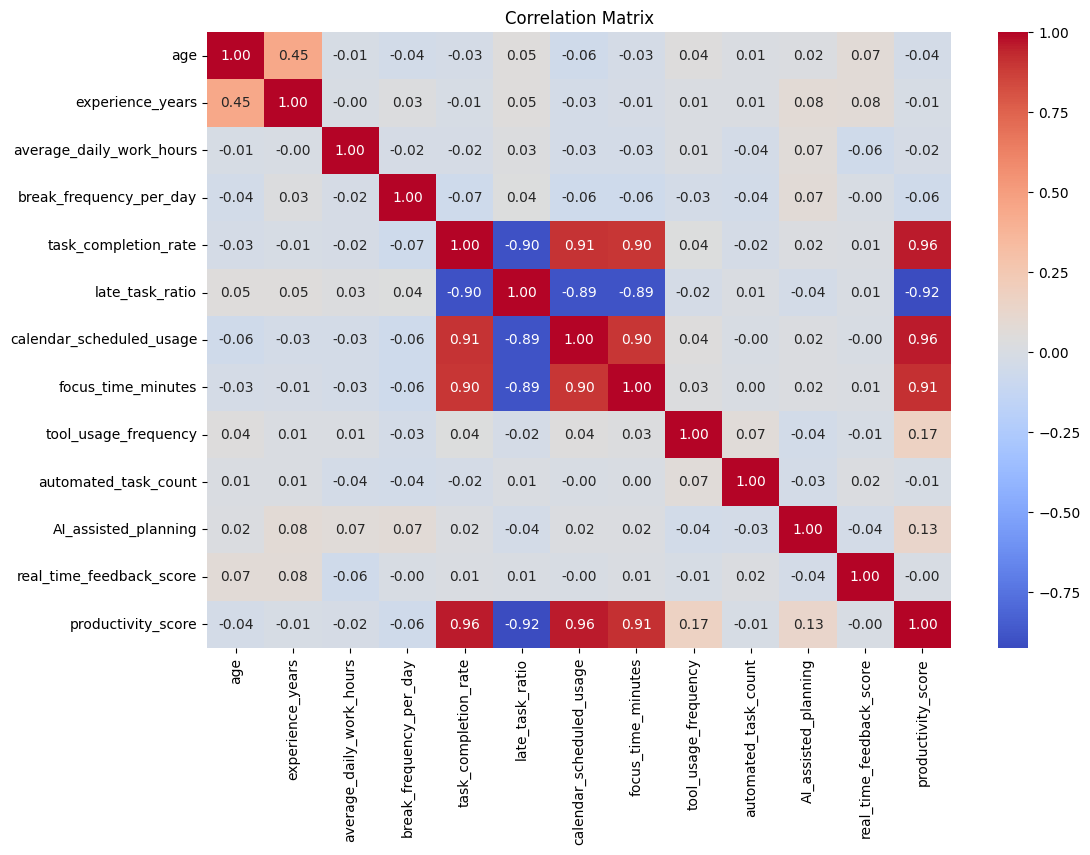

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


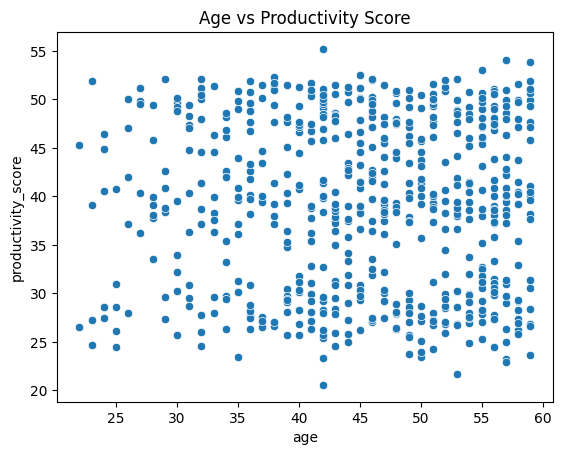

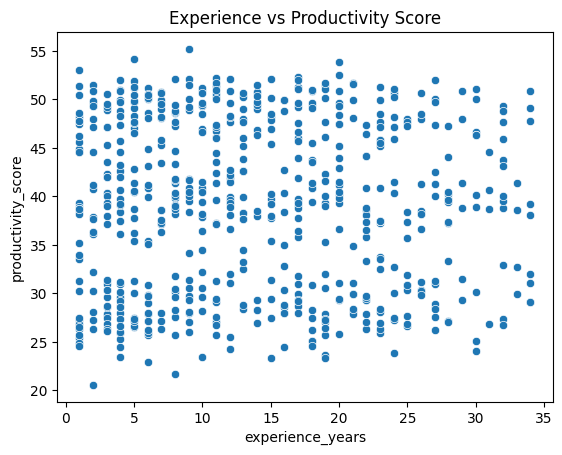

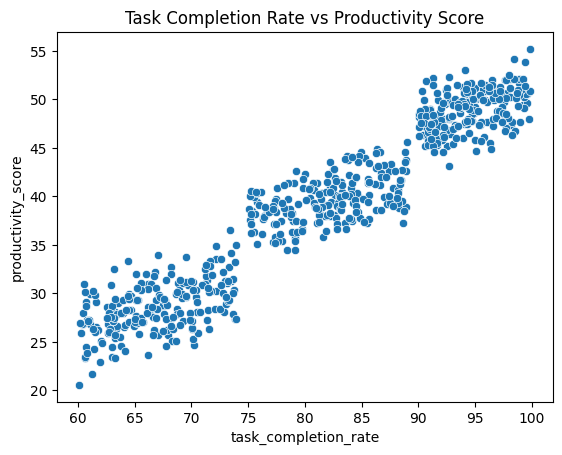

In [8]:
# Age vs Productivity Score
sns.scatterplot(x='age', y='productivity_score', data=df)
plt.title('Age vs Productivity Score')
plt.show()

# Experience vs Productivity Score
sns.scatterplot(x='experience_years', y='productivity_score', data=df)
plt.title('Experience vs Productivity Score')
plt.show()

# Task Completion Rate vs Productivity Score
sns.scatterplot(x='task_completion_rate', y='productivity_score', data=df)
plt.title('Task Completion Rate vs Productivity Score')
plt.show()



GROUPING AND COMPARING

location_type
City       39.957955
Town       38.405468
Village    38.487917
Name: productivity_score, dtype: float64


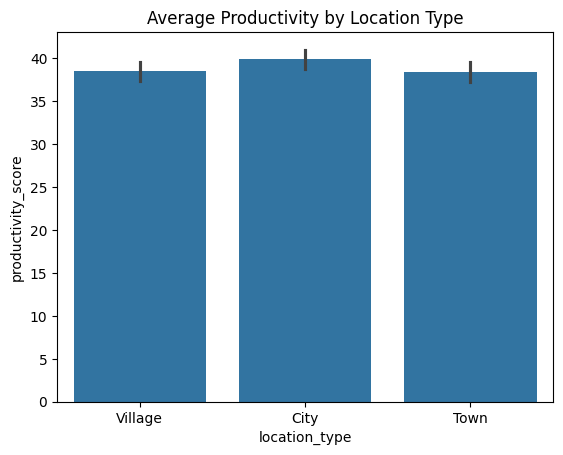

In [9]:
#Average Productivity Score by Location Type
print(df.groupby('location_type')['productivity_score'].mean())

sns.barplot(x='location_type', y='productivity_score', data=df)
plt.title('Average Productivity by Location Type')
plt.show()


industry_sector
Healthcare    39.780976
Finance       39.686455
IT            39.104318
Education     38.569225
Retail        37.903636
Name: productivity_score, dtype: float64


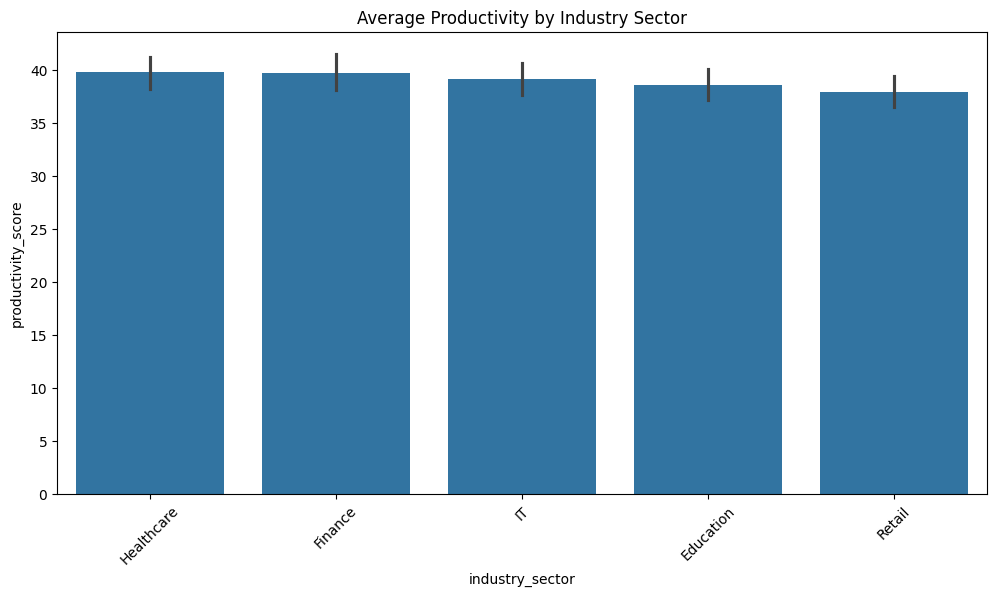

In [10]:
#Average Productivity Score by Industry Sector
print(df.groupby('industry_sector')['productivity_score'].mean().sort_values(ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(x='industry_sector', y='productivity_score', data=df, order=df.groupby('industry_sector')['productivity_score'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Average Productivity by Industry Sector')
plt.show()


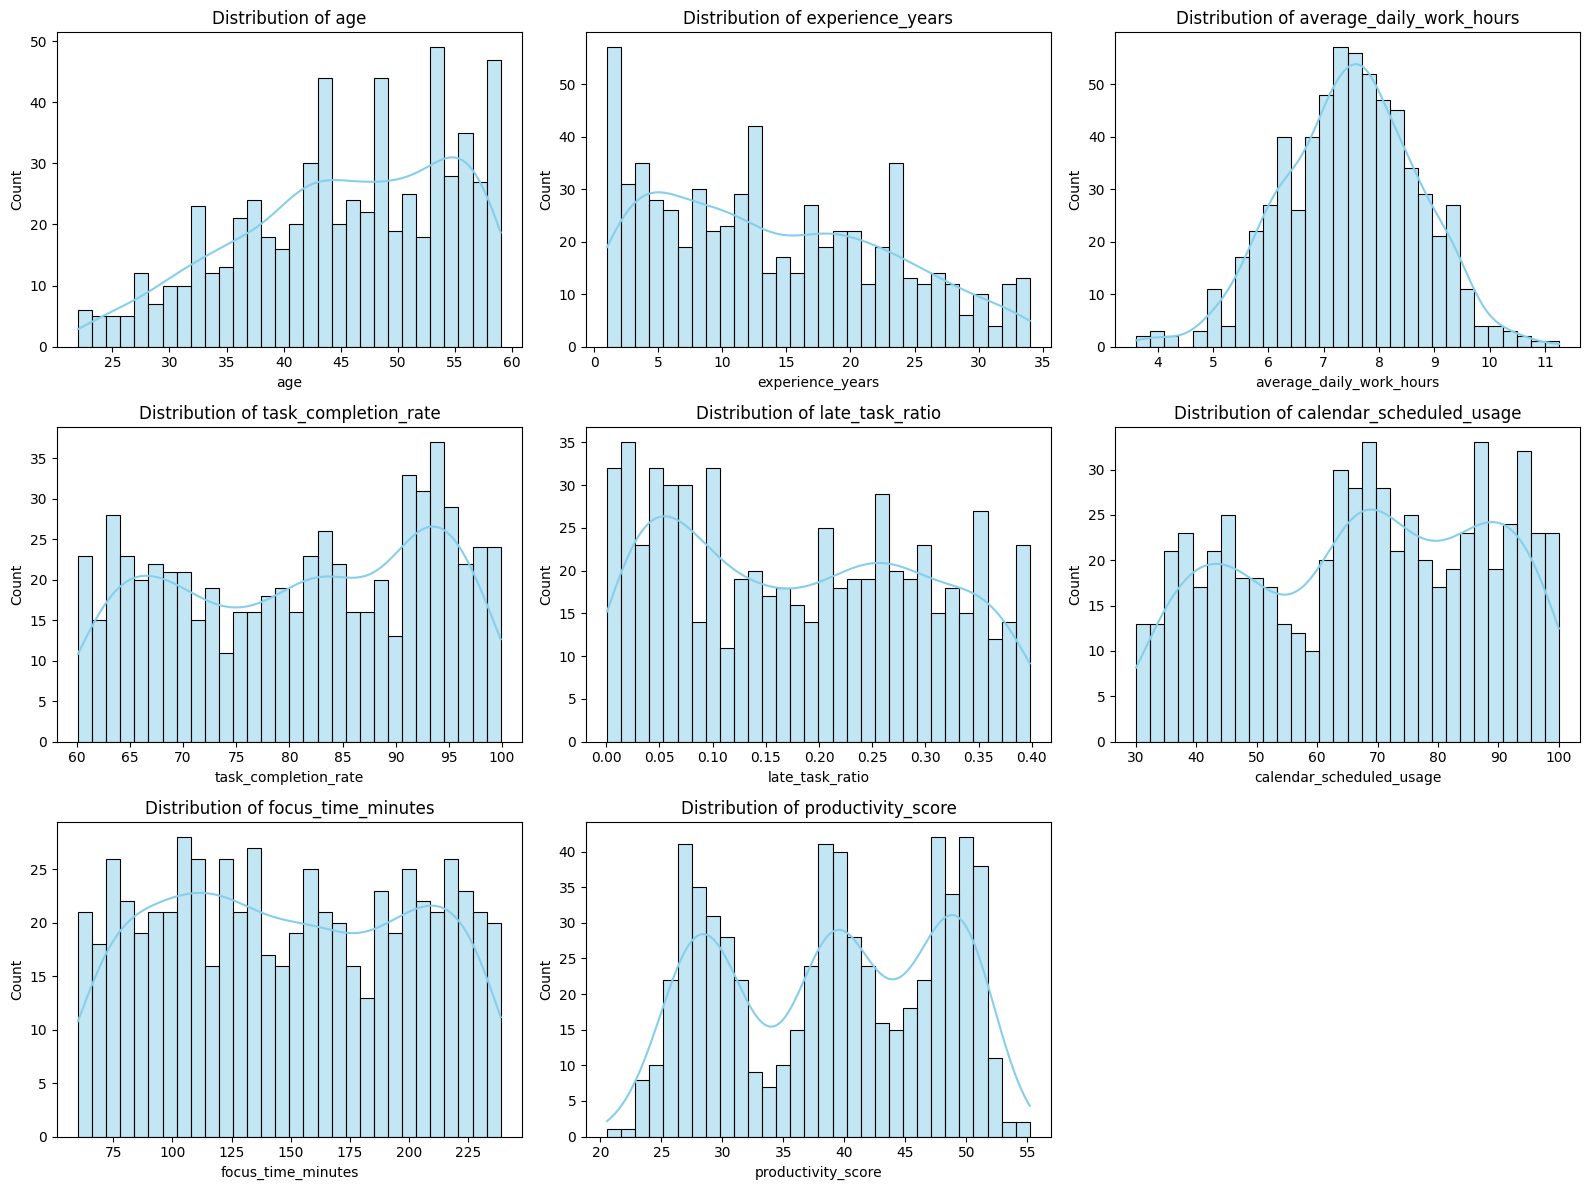

In [11]:
 #Histograms (Numeric Features)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = [
    'age', 'experience_years', 'average_daily_work_hours',
    'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage',
    'focus_time_minutes', 'productivity_score'
]

# Set grid
plt.figure(figsize=(16, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


/var/folders/m4/br0m9jg91fj7v4b6h9gbxwkr0000gn/T/ipykernel_44027/1133328313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
/var/folders/m4/br0m9jg91fj7v4b6h9gbxwkr0000gn/T/ipykernel_44027/1133328313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')
/var/folders/m4/br0m9jg91fj7v4b6h9gbxwkr0000gn/T/ipykernel_44027/1133328313.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


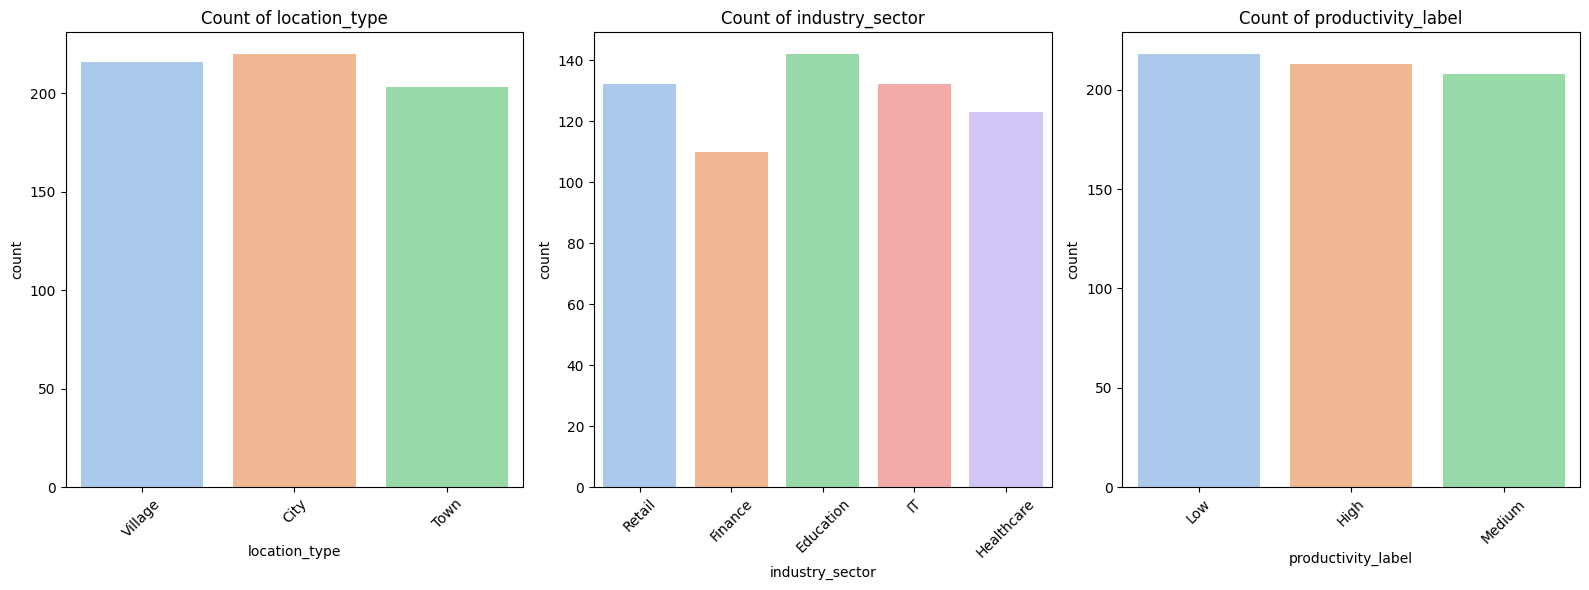

In [12]:
#How many recordds exist per catagory
categorical_cols = ['location_type', 'industry_sector', 'productivity_label']

plt.figure(figsize=(16, 6))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
